### Import Libraries

In [443]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# import model evaluation and selection tools
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib # to save the model

### Load Data

In [444]:
data = pd.read_csv('data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [445]:
# checking for duplicate rows and null values
print(f"Duplicate rows: {data.duplicated().sum()}")
print(f"\nNull values:\n{data.isnull().sum()}")

Duplicate rows: 0

Null values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### Exploratory Data Analysis (EDA)

In [446]:
data.shape

(4600, 18)

In [447]:
data.info()
# note bedrooms and bathrooms are float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [448]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [449]:
# convert 'date' column to datetime data type
data.date = pd.to_datetime(data.date)
data["yr_sold"] = data["date"].dt.year
data.yr_sold.value_counts()
# all houses were sold in 2014

yr_sold
2014    4600
Name: count, dtype: int64

In [450]:
# new column 'house_age' to represent age of house at the time of sale
data['house_age'] = data.yr_sold - data.yr_built
data.house_age.describe()

count    4600.000000
mean       43.213696
std        29.731848
min         0.000000
25%        17.000000
50%        38.000000
75%        63.000000
max       114.000000
Name: house_age, dtype: float64

In [451]:
data.bedrooms.value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [452]:
# bedrooms can be integer values
data['bedrooms'] = data['bedrooms'].astype(int)
data.bedrooms.value_counts()

bedrooms
3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: count, dtype: int64

In [453]:
# unrealistic values of 0 bedrooms and outlier values of 8 and 9 bedrooms
check_bedrooms = [0, 8, 9]
data[data['bedrooms'].isin(check_bedrooms)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_sold,house_age
241,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0,0,3,2450,1380,1938,2003,8809 Densmore Ave N,Seattle,WA 98103,USA,2014,76
1500,2014-05-28,1970000.0,8,3.50,4440,6480,2.0,0,3,5,3140,1300,1959,0,1210 22nd Ave E,Seattle,WA 98112,USA,2014,55
2365,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA,2014,24
3209,2014-06-24,1295648.0,0,0.00,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA,2014,24
3911,2014-07-03,340000.0,8,2.75,2790,6695,1.0,0,0,3,1470,1320,1977,2004,17512 Corliss Ave N,Shoreline,WA 98133,USA,2014,37


In [454]:
data.bathrooms.value_counts()
# after research a full bathroom containing sink, toilet, shower/bathtub is counted as 1.0
# three-quater bathroom contain sink, toilet and shower(no tub) is counted as 0.75
# half bathroom contain sink and toilet only is counted as 0.5
# one-quater bathroom contain toilet or sink only is counted as 0.25 this is rare as both sink and toilet should be there in a bathroom
# each utility (shower, tub, toilet, sink) is counted as 0.25

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [455]:
# new columns 'bathroom_full', 'bathroom_half', 'bathroom_quarter' to represent number of full, half and quarter bathrooms
for index, row in data.iterrows():
    full = int(row['bathrooms'])
    remainder = row['bathrooms'] - full
    three_quater = 0
    half = 0
    one_quarter = 0
    
    if remainder == 0.75:
        three_quater = 1
    elif remainder == 0.5:
        half = 1
    elif remainder == 0.25:
        one_quarter = 1

    data.at[index, 'bathroom_full'] = full
    data.at[index, 'bathroom_3_quarter'] = three_quater
    data.at[index, 'bathroom_half'] = half
    data.at[index, 'bathroom_1_quarter'] = quarter

In [456]:
data[['bathrooms', 'bathroom_full', 'bathroom_3_quarter', 'bathroom_half', 'bathroom_1_quarter']].sample(10)

,bathrooms,bathroom_full,bathroom_3_quarter,bathroom_half,bathroom_1_quarter
543,3.75,3.0,1.0,0.0,0.0
2812,2.50,2.0,0.0,1.0,0.0
2799,2.25,2.0,0.0,0.0,0.0
4501,2.00,2.0,0.0,0.0,0.0
2261,4.50,4.0,0.0,1.0,0.0
3214,1.50,1.0,0.0,1.0,0.0
1319,2.50,2.0,0.0,1.0,0.0
1429,2.50,2.0,0.0,1.0,0.0
3374,1.50,1.0,0.0,1.0,0.0
1769,2.25,2.0,0.0,0.0,0.0


In [457]:
# unrealistic values of 0.00 bathrooms and outlier values of 5.75, 6.25, 6.50, 6.75, 8.00 bathrooms
check_bathrooms = [0.00, 5.75, 6.25, 6.50, 6.75, 8.0]
data[data['bathrooms'].isin(check_bathrooms)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,yr_sold,house_age,bathroom_full,bathroom_3_quarter,bathroom_half,bathroom_1_quarter
122,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,3,...,26408 NE 70th St,Redmond,WA 98053,USA,2014,15,8.0,0.0,0.0,0.0
291,2014-05-07,540000.0,7,5.75,3700,7647,2.0,0,1,3,...,15007-15299 37th Ave NE,Lake Forest Park,WA 98155,USA,2014,66,5.0,1.0,0.0,0.0
462,2014-05-09,2238888.0,5,6.50,7270,130017,2.0,0,0,3,...,7070 270th Pl SE,Issaquah,WA 98029,USA,2014,4,6.0,0.0,1.0,0.0
2328,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,3,...,1291 NW Elford Dr,Seattle,WA 98177,USA,2014,49,6.0,0.0,0.0,0.0
2365,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,...,814 E Howe St,Seattle,WA 98102,USA,2014,24,0.0,0.0,0.0,0.0
2654,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,3,...,5044 Butterworth Rd,Mercer Island,WA 98040,USA,2014,31,6.0,1.0,0.0,0.0
3209,2014-06-24,1295648.0,0,0.00,4810,28008,2.0,0,0,3,...,20418 NE 64th Pl,Redmond,WA 98053,USA,2014,24,0.0,0.0,0.0,0.0
4575,2014-07-02,0.0,5,6.25,8020,21738,2.0,0,0,3,...,2 Crescent Key,Bellevue,WA 98006,USA,2014,13,6.0,0.0,0.0,0.0


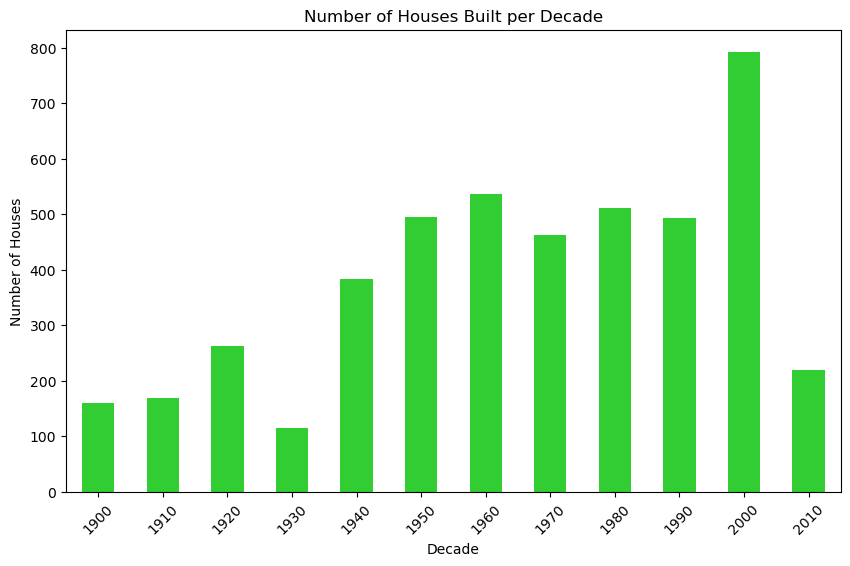

In [458]:
# inspect yr_built column by plotting a countplot of houses built per decade
decades = data.yr_built // 10 * 10
decade_counts = decades.value_counts().sort_index()

plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='limegreen')
plt.title('Number of Houses Built per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

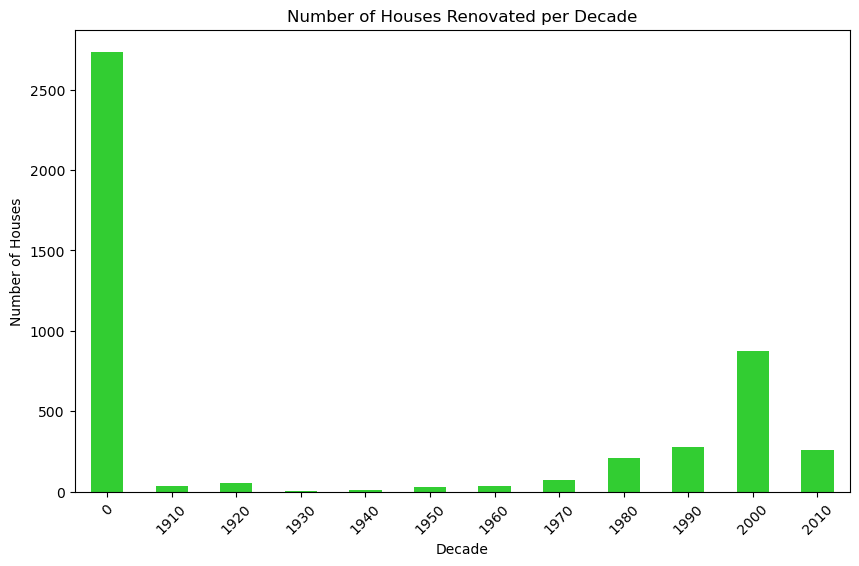

In [459]:
# inspect yr_renovated column by plotting a countplot of houses renovated per decade
renovation_decades = data.yr_renovated // 10 * 10
renovation_decade_counts = renovation_decades.value_counts().sort_index()

plt.figure(figsize=(10, 6))
renovation_decade_counts.plot(kind='bar', color='limegreen')
plt.title('Number of Houses Renovated per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()
# half of the houses were never renovated (yr_renovated = 0)

In [460]:
# new column 'renovated' to indicate whether a house has been renovated or not
data['has_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)
data.has_renovated.value_counts()

has_renovated
0    2735
1    1865
Name: count, dtype: int64

In [461]:
# new column state and zip code extract from 'statezip' column
data['state'] = data['statezip'].apply(lambda x: x.split(' ')[0])
data['zip_code'] = data['statezip'].apply(lambda x: x.split(' ')[1])
print(data.state.value_counts())
print(data.zip_code.value_counts())

state
WA    4600
Name: count, dtype: int64
zip_code
98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98047      6
98288      3
98050      2
98354      2
98068      1
Name: count, Length: 77, dtype: int64


In [462]:
# inspect street, city, state, zip_code, country columns
data[['street', 'city', 'state', 'zip_code', 'country']].nunique()

# the dataset contains houses from capital city of USA Washington only
# street and zip_code column has too many unique values
# city column has 44 unique values which may be useful for prediction

street      4525
city          44
state          1
zip_code      77
country        1
dtype: int64

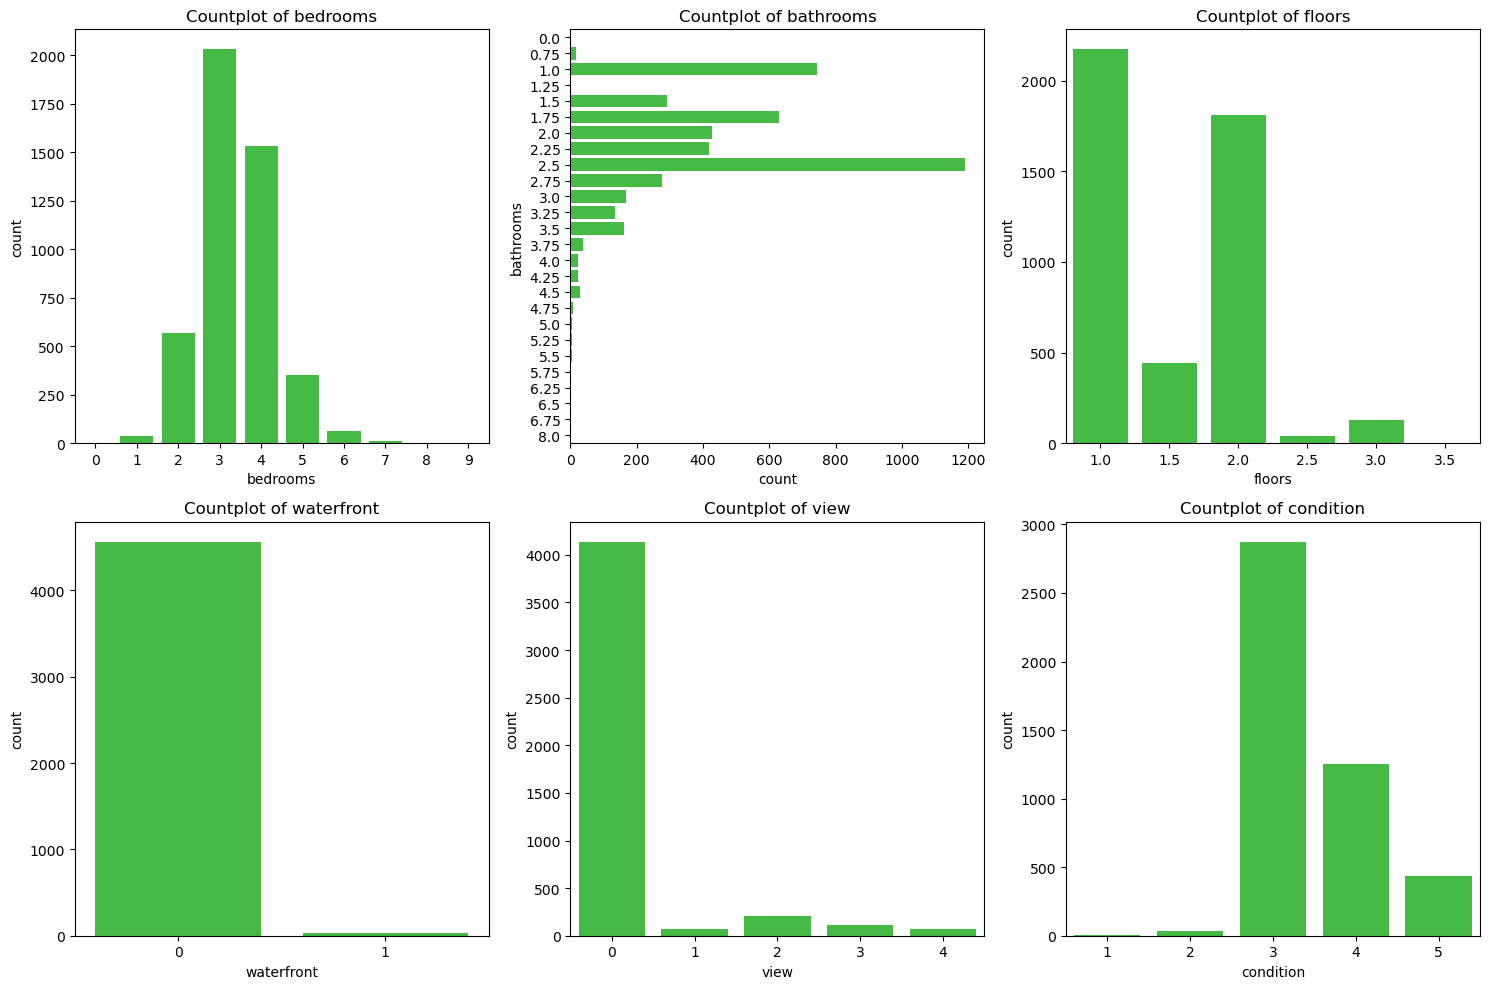

In [463]:
# inspect bedroom, bathroom, floors, waterfront, view, condition columns
cols_to_count_plot = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

plt.figure(figsize=(15, 10))
for col in cols_to_count_plot:
    plt.subplot(2, 3, cols_to_count_plot.index(col) + 1)
    if col == 'bathrooms':
        # horizontal countplot for better visibility
        sns.countplot(data=data, y=col, color='limegreen')
    else:
        sns.countplot(data=data, x=col, color='limegreen')
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
plt.show()

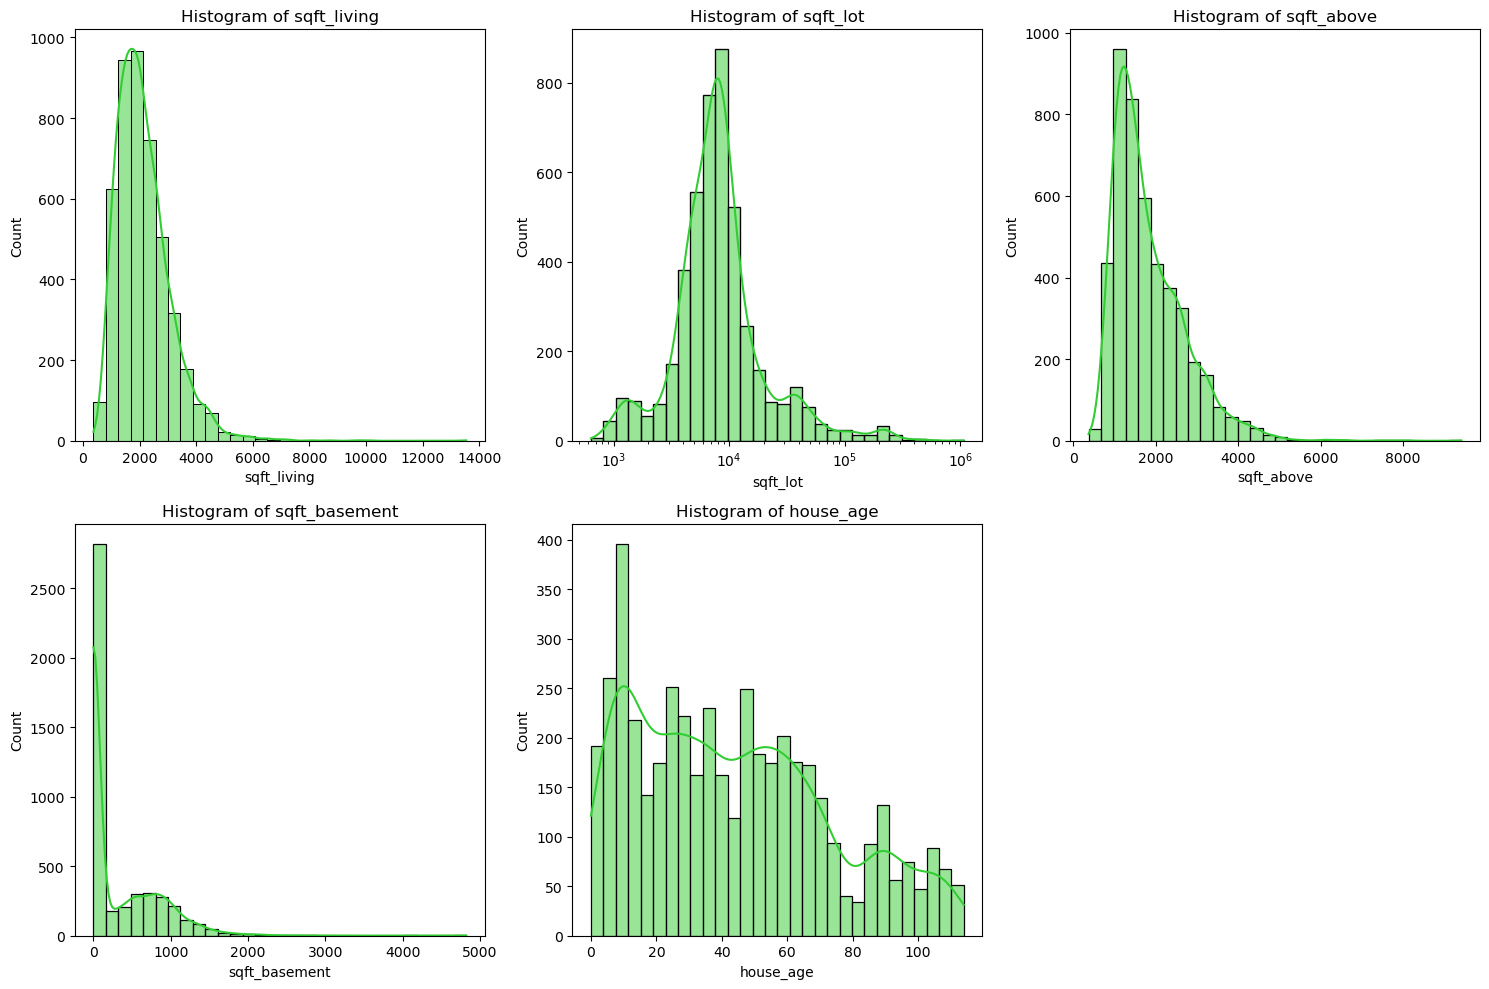

In [464]:
# inspect sqft_living, sqft_lot, sqft_above, sqft_basement columns
cols_to_hist_plot = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']

plt.figure(figsize=(15, 10))
for col in cols_to_hist_plot:
    plt.subplot(2, 3, cols_to_hist_plot.index(col) + 1)
    # apply log scale to sqft_lot due to large range of values
    if col == 'sqft_lot':
        sns.histplot(data=data, x=col, bins=30, log_scale=True, color='limegreen', kde=True)
    else:
        sns.histplot(data=data, x=col, bins=30, color='limegreen', kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()


# half of the houses have no basement (sqft_basement = 0)

In [465]:
data.price.describe()
# there are house price with 0 value which is not realistic

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [466]:
# check prices with 0 value
print(data[data['price'] == 0].shape)

# drop rows with 0 price
data = data[data['price'] != 0].copy()

print(data.price.describe())

(49, 27)
count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64


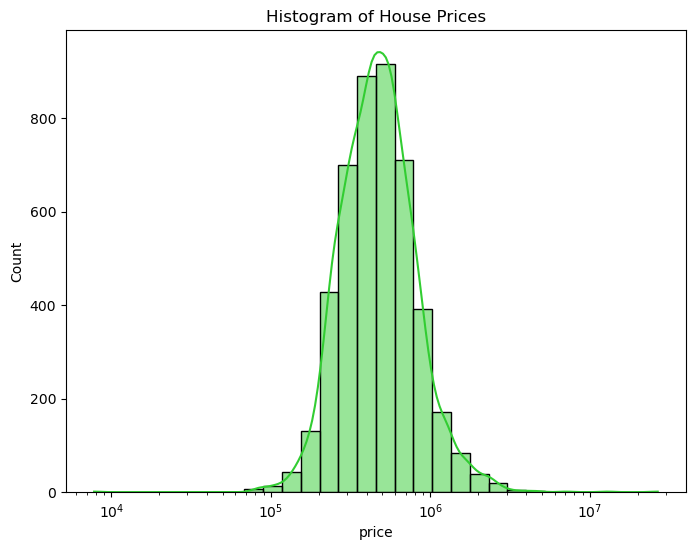

In [467]:
# inspect price column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', bins=30, log_scale=True, color='limegreen', kde=True)
plt.title('Histogram of House Prices')
plt.show()

In [468]:
# new column price_per_sqft_living
data['price_per_sqft_living'] = data['price'] / data['sqft_living']
print(data.price_per_sqft_living.describe())

count     4551.000000
mean       268.738914
std        358.351177
min         10.000000
25%        182.889483
50%        245.424837
75%        315.733720
max      22533.898305
Name: price_per_sqft_living, dtype: float64


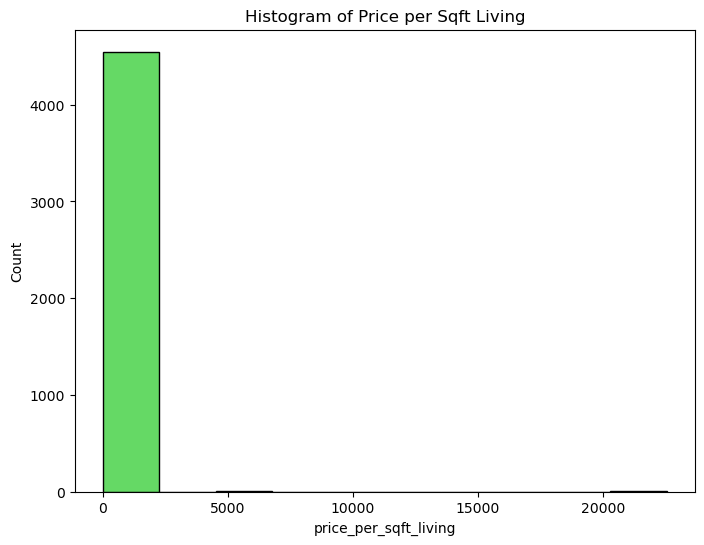

In [469]:
# inspect price_per_sqft_living column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price_per_sqft_living', bins=10, color='limegreen')
plt.title('Histogram of Price per Sqft Living')
plt.show()

# outliers of 5000 and 20000 values in price_per_sqft_living which are abnormally high
# it may cause by incorrect sqft_living or price values

In [470]:
# check the rows with price_per_sqft_living greater than 1000
data[data['price_per_sqft_living'] > 1000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_sold,house_age,bathroom_full,bathroom_3_quarter,bathroom_half,bathroom_1_quarter,has_renovated,state,zip_code,price_per_sqft_living
4346,2014-06-23,1.289900e+07,3,2.5,2190,11394,1.0,0,0,3,...,2014,58,2.0,0.0,1.0,0.0,1,WA,98199,5889.954338
4347,2014-05-08,2.110000e+06,4,1.0,2100,9200,1.0,0,0,3,...,2014,55,1.0,0.0,0.0,0.0,1,WA,98168,1004.761905
4348,2014-05-05,2.199900e+06,4,1.5,1120,5427,1.0,0,0,3,...,2014,45,1.0,0.0,1.0,0.0,1,WA,98042,1964.196429
4350,2014-07-03,2.659000e+07,3,2.0,1180,7793,1.0,0,0,4,...,2014,22,2.0,0.0,0.0,0.0,0,WA,98031,22533.898305
4465,2014-06-05,2.560498e+06,3,2.5,1710,1664,2.0,0,0,5,...,2014,11,2.0,0.0,1.0,0.0,0,WA,98199,1497.367446


In [471]:
# remove outliers where price_per_sqft_living is greater than 1000
data = data[data['price_per_sqft_living'] <= 1000].copy()

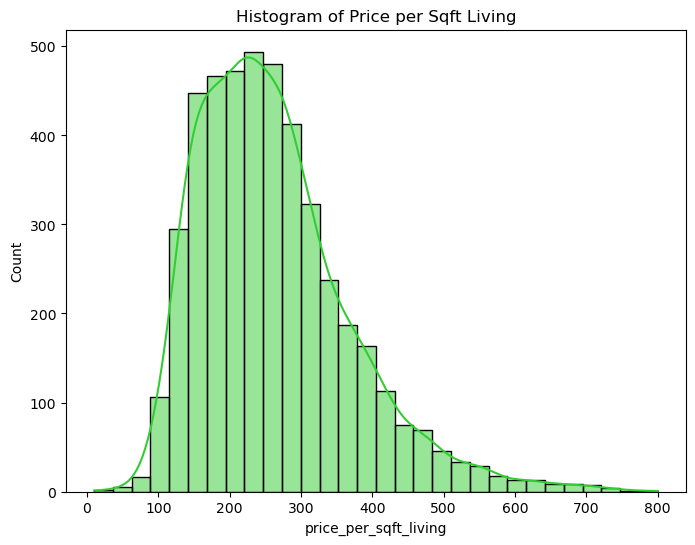

In [472]:
# inspect price_per_sqft_living column after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price_per_sqft_living', bins=30, color='limegreen', kde=True)
plt.title('Histogram of Price per Sqft Living')
plt.show()

In [473]:
# further remove outliers using IQR method for all numerical columns
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

price: 235 outliers
bedrooms: 115 outliers
bathrooms: 130 outliers
sqft_living: 128 outliers
sqft_lot: 540 outliers
floors: 0 outliers
waterfront: 30 outliers
view: 448 outliers
condition: 6 outliers
sqft_above: 111 outliers
sqft_basement: 83 outliers
yr_built: 0 outliers
yr_renovated: 0 outliers
yr_sold: 0 outliers
house_age: 0 outliers
bathroom_full: 94 outliers
bathroom_3_quarter: 958 outliers
bathroom_half: 0 outliers
bathroom_1_quarter: 0 outliers
has_renovated: 0 outliers
price_per_sqft_living: 132 outliers


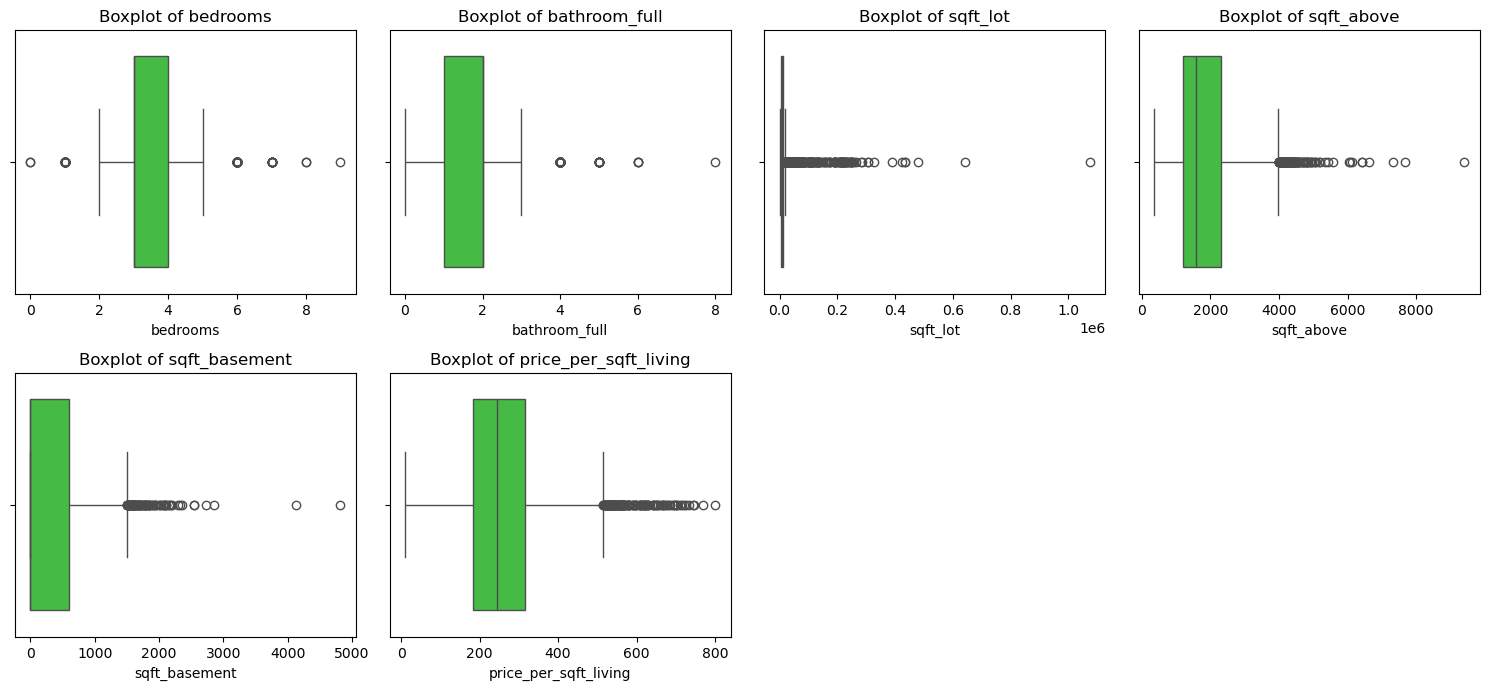

In [474]:
# boxplot to visualize outliers in numerical columns
cols_to_check_outliers = ['bedrooms', 'bathroom_full', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price_per_sqft_living']

plt.figure(figsize=(15, 10))
for col in cols_to_check_outliers:
    plt.subplot(3, 4, cols_to_check_outliers.index(col) + 1)
    sns.boxplot(data=data, x=col, color='limegreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [475]:
data = data[data['bedrooms'] > 0]
data = data[data['bedrooms'] < 8]
data = data[data['bathroom_full'] > 0]
data = data[data['bathroom_full'] < 6]
data = data[data['sqft_lot'] < 200000]
data = data[data['sqft_above'] < 5000]
data = data[data['sqft_basement'] < 2500]
data = data[data['price_per_sqft_living'] < 600]

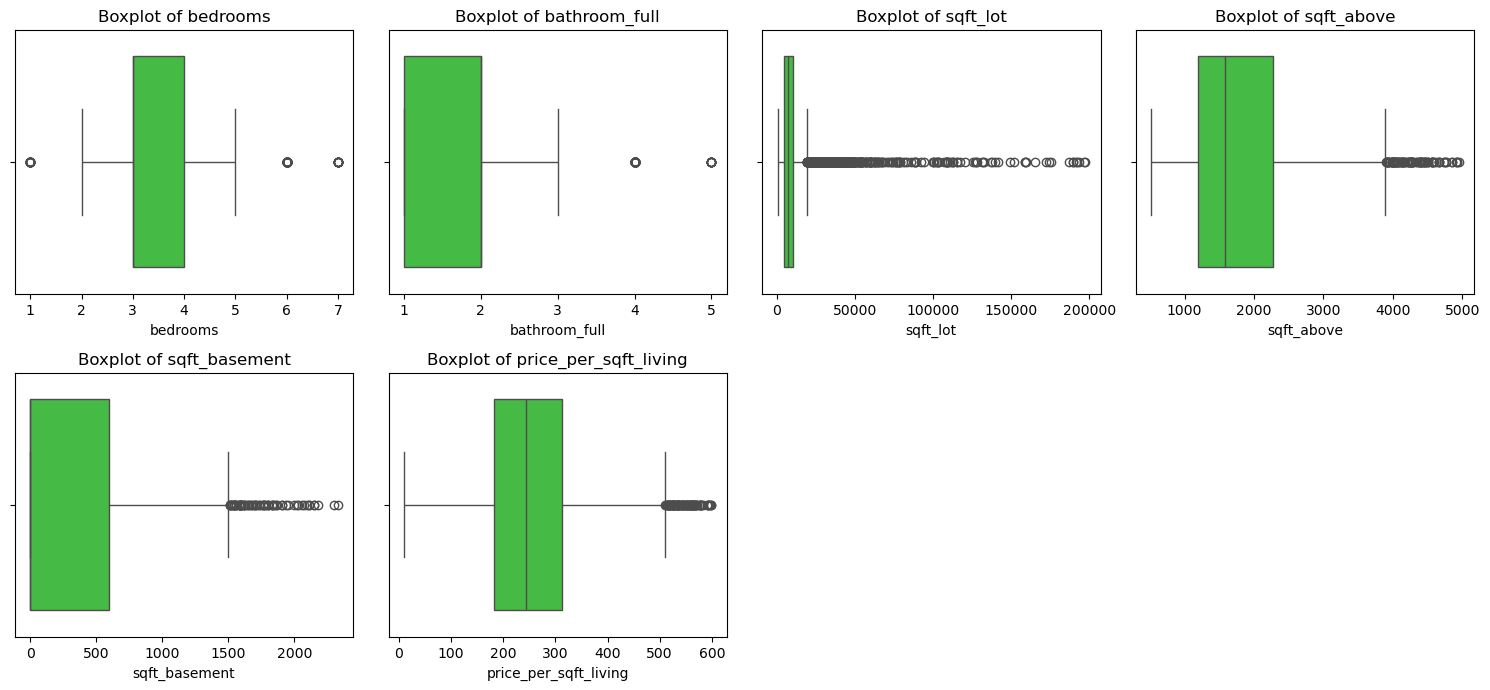

In [476]:
# boxplot to visualize after removing outliers
plt.figure(figsize=(15, 10))
for col in cols_to_check_outliers:
    plt.subplot(3, 4, cols_to_check_outliers.index(col) + 1)
    sns.boxplot(data=data, x=col, color='limegreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

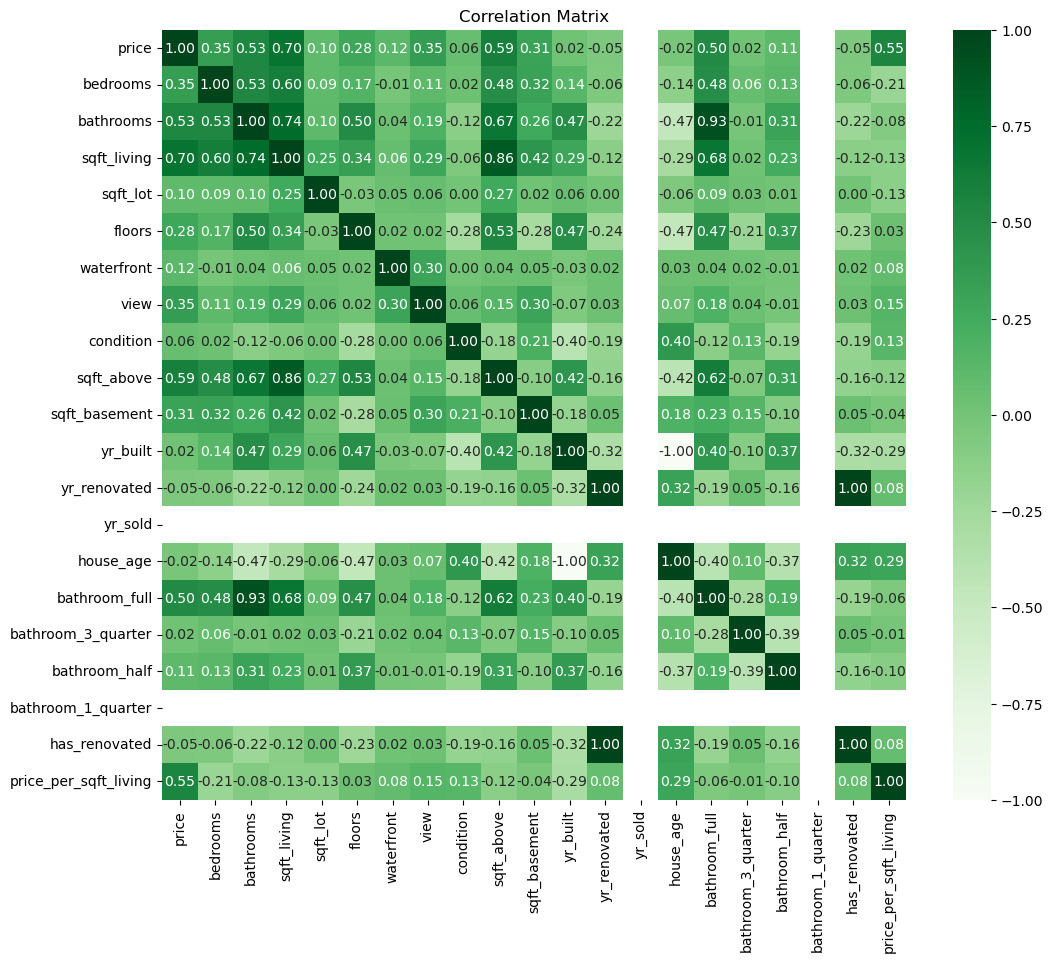

In [477]:
# correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [478]:
# total 44 unique cities
data.city.nunique()

44

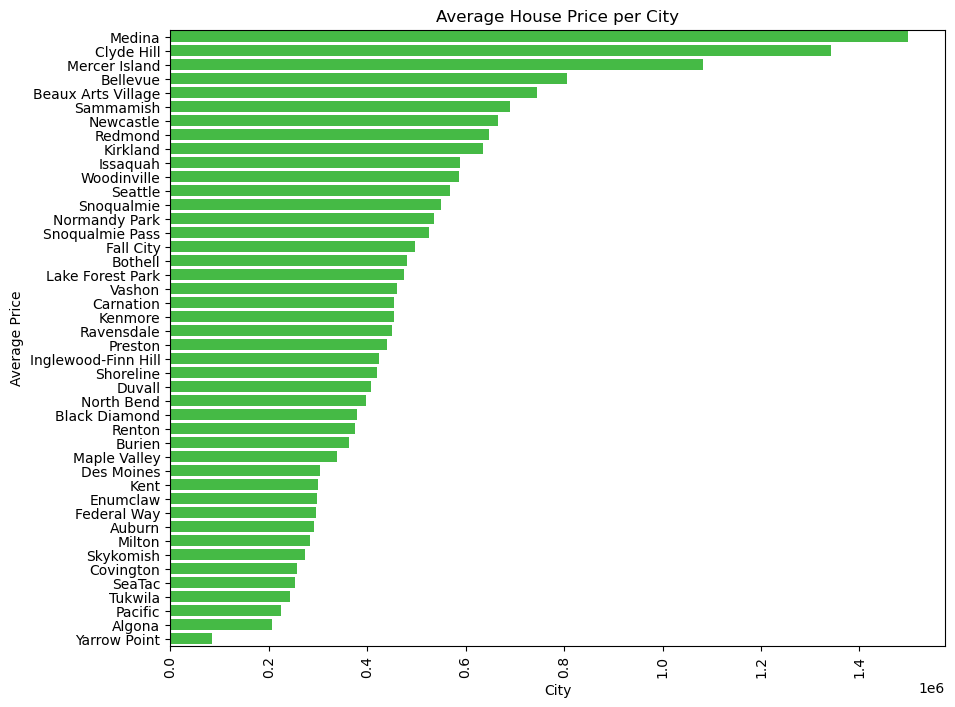

In [479]:
# group by city to get average house price per city
avg_price_per_city = data.groupby(by='city')['price'].mean().sort_values(ascending=False)

# plot average house price
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_price_per_city.values , y=avg_price_per_city.index, color='limegreen')
plt.xticks(rotation=90)
plt.title('Average House Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

In [480]:
# Drop irrelevant columns
cols_to_drop = ['date', 'yr_built', 'yr_renovated', 'street', 'statezip', 'country', 'yr_sold', 'state', 'zip_code', 'bathrooms', 'price_per_sqft_living']
cleaned_data = data.drop(columns=cols_to_drop)

In [481]:
print(cleaned_data.shape)
print(cleaned_data.columns)

(4417, 17)
Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'city', 'house_age',
       'bathroom_full', 'bathroom_3_quarter', 'bathroom_half',
       'bathroom_1_quarter', 'has_renovated'],
      dtype='object')


In [482]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

### Model Training

In [483]:
cleaned_data = pd.read_csv('cleaned_data.csv')

In [484]:
# encode city column using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder.fit_transform(cleaned_data[['city']])
encoded_df = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(['city']),
    index=cleaned_data.index
)

cleaned_data = pd.concat([cleaned_data.drop(columns=['city']), encoded_df], axis=1)

In [485]:
cleaned_data_raw = cleaned_data.copy()

In [487]:
# standardize numerical columns
binary_cols = ['waterfront', 'bathroom_3_quarter', 'bathroom_half', 'bathroom_1_quarter', 'has_renovated', 'has_basement']
discrete_cols = ['bedrooms', 'floors', 'view', 'condition', 'bathroom_full']
continuous_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']

# initialize scalers
discrete_scaler = MinMaxScaler()
continuous_scaler = StandardScaler()

# scale the columns
cleaned_data[discrete_cols] = discrete_scaler.fit_transform(cleaned_data[discrete_cols])
cleaned_data[continuous_cols] = continuous_scaler.fit_transform(cleaned_data[continuous_cols])

In [488]:
# Split dataset into training and testing sets
x = cleaned_data.drop(columns='price')
y = cleaned_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (3091, 58)
Testing set size: (1326, 58)


In [489]:
# Linear Regression Model
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [490]:
# Predictions on test sets
y_pred = model_LR.predict(x_test)

In [491]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 112390.85
Mean Squared Error: 31840938213.82
Root Mean Squared Error: 178440.29
R² Score: 0.6940


In [492]:
# Cross validation using k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model_LR, x, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f}")

Cross-validation RMSE scores: [174464.89569449 182993.92741418 145944.05797394 174759.21836084
 157102.81154708]
Average CV RMSE: 167052.98


In [493]:
# train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
}

# function to perform model selection
def model_evaluate(models, x_train, y_train, x_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }
    return pd.DataFrame(results).T

model_performance = model_evaluate(models, x_train, y_train, x_test, y_test)
print(model_performance)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+13, tolerance: 2.820e+10
  model = cd_fast.enet_coordinate_descent(


                             MAE           MSE           RMSE        R2
Linear Regression  112390.847817  3.184094e+10  178440.293134  0.693999
Ridge              112442.032662  3.143004e+10  177285.190843  0.697948
Lasso              112359.226396  3.182165e+10  178386.241081  0.694184
KNN                117206.941679  3.610733e+10  190019.299126  0.652997
Decision Tree      151088.785135  6.639333e+10  257669.027054  0.361940
SVR                216133.185529  1.085768e+11  329509.906703 -0.043456


In [494]:
# function to perform cross validation for model comparison
def cross_validation(models, x, y, n_splits=5):
    results = {}
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)
    for name, model in models.items():
        cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
        cv_rmse_scores = np.sqrt(-cv_scores)
        results[name] = {
            'CV_RMSE_scores': cv_rmse_scores,
            'CV_RMSE_Mean': cv_rmse_scores.mean(),
            'CV_RMSE_Std': cv_rmse_scores.std()
        }
    return pd.DataFrame(results).T

pd.set_option('display.max_colwidth', None)

cv_performance = cross_validation(models, x, y)
print(cv_performance)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+13, tolerance: 3.230e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+13, tolerance: 3.330e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.362e+12, tolerance: 

                                                                                                        CV_RMSE_scores  \
Linear Regression    [174464.89569449035, 182993.92741418138, 145944.0579739351, 174759.2183608364, 157102.8115470842]   
Ridge              [174858.99787613697, 180998.35417826736, 147478.47926849252, 175299.6063984768, 157000.67885667973]   
Lasso               [174532.59269486388, 182872.90120778713, 145961.8447720733, 174763.3786105056, 157049.80036689987]   
KNN                 [189389.44208587098, 196740.36763904523, 162269.5681045552, 197710.8106500451, 175551.76988243003]   
Decision Tree       [245983.82769454407, 242406.07246662778, 224370.4183112667, 225929.1911357048, 227422.66814852046]   
SVR                  [338000.06760575715, 321456.3145134986, 301094.6158774156, 315570.9285500062, 303809.21434130595]   

                    CV_RMSE_Mean   CV_RMSE_Std  
Linear Regression  167052.982198   13513.17024  
Ridge              167127.223316  12709.024351 

In [508]:
ridge_params = {
    'alpha': [0.01, 0.02, 0.05, 0.1, 0.2],
    'max_iter': [50000]
}

lasso_params = {
    'alpha': [30, 35, 40, 50, 60],
    'max_iter': [50000]
}

ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(x_train, y_train)

lasso_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(x_train, y_train)

print(f"Best Ridge parameters: {ridge_search.best_params_}")
print(f"Best Lasso parameters: {lasso_search.best_params_}")

Best Ridge parameters: {'alpha': 0.05, 'max_iter': 50000}
Best Lasso parameters: {'alpha': 40, 'max_iter': 50000}


In [509]:
# evaluate best models from grid search
best_ridge = ridge_search.best_estimator_
best_lasso = lasso_search.best_estimator_

models = {
    'Best Ridge': best_ridge,
    'Best Lasso': best_lasso
}

model_performance = model_evaluate(models, x_train, y_train, x_test, y_test)
print(model_performance)

cv_performance = cross_validation(models, x, y)
print(cv_performance)

                      MAE           MSE           RMSE        R2
Best Ridge  112333.067265  3.178932e+10  178295.590494  0.694495
Best Lasso  112412.539000  3.174668e+10  178175.984911  0.694905
                                                                                                  CV_RMSE_scores  \
Best Ridge  [174596.57868237735, 182693.66623769546, 146046.98732539744, 174800.64013921257, 157004.33793115785]   
Best Lasso   [174805.99433721742, 182343.07292956024, 146612.82019429392, 174928.5229829887, 156873.41666228342]   

             CV_RMSE_Mean   CV_RMSE_Std  
Best Ridge  167028.442063  13444.605683  
Best Lasso  167112.765421   13246.32871  


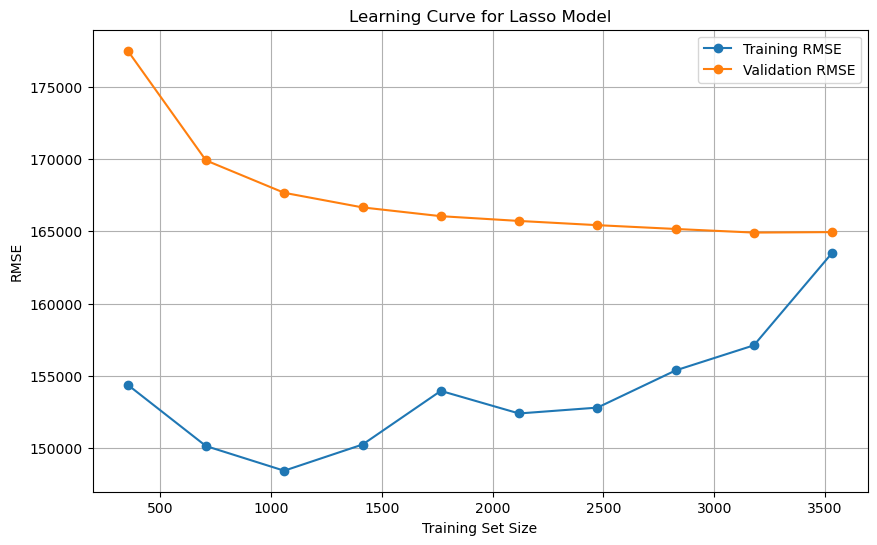

In [510]:
# plot learning curve for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_lasso, x, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=123
)
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)
train_rmse_mean = train_rmse.mean(axis=1)
test_rmse_mean = test_rmse.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse_mean, label='Validation RMSE', marker='o')
plt.title('Learning Curve for Lasso Model')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

In [515]:
# important features of best_lasso model
lasso_coefficients = pd.Series(best_lasso.coef_, index=x.columns)
print(lasso_coefficients.head(15).sort_values(ascending=False))
print("\nTop 10 important features based on absolute coefficients:")
print(lasso_coefficients.abs().sort_values(ascending=False).head(10))

waterfront            246601.074424
bathroom_full         212134.296373
view                  205163.575815
sqft_living           126798.378256
condition             123257.239262
sqft_above             64296.647126
floors                 45641.736170
house_age              32363.744445
bathroom_3_quarter     27549.447818
bathroom_half          13021.313287
has_renovated           6827.792971
sqft_basement              0.000000
bathroom_1_quarter         0.000000
sqft_lot               -4391.762757
bedrooms             -181263.516352
dtype: float64

Top 10 important features based on absolute coefficients:
city_Medina           984052.403332
city_Clyde Hill       756336.691155
city_Mercer Island    411149.824856
city_Bellevue         270474.221115
waterfront            246601.074424
bathroom_full         212134.296373
view                  205163.575815
bedrooms              181263.516352
city_Seattle          178628.164458
city_Kirkland         178074.391611
dtype: float64


### Model Prediction

In [516]:
# add default input for prediction using mode and mean values
mode_columns = ["bedrooms", "bathroom_full", "bathroom_3_quarter", "bathroom_half", "bathroom_1_quarter", "condition", "view", "floors", "waterfront", "has_renovated"]
mean_columns = ["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "house_age"]

default_input = {}
for col in mode_columns:
    default_input[col] = cleaned_data_raw[col].mode()[0]
for col in mean_columns:
    default_input[col] = round(cleaned_data_raw[col].mean(), 2)

default_city = 'Seattle' # default city for prediction

In [517]:
# save the best model
best_model = best_lasso

artifact = {
    'model': best_model,
    'features': x.columns.tolist(),
    'discrete_features': discrete_cols,
    'continuous_features': continuous_cols,
    'discrete_scaler': discrete_scaler,
    'continuous_scaler': continuous_scaler,
    'default_input': default_input,
    'default_city': default_city,
}
joblib.dump(artifact, 'model/best_model.pkl')

['model/best_model.pkl']

In [518]:
class HousePricePredictor:
    def __init__(self, model_path='model/best_model.pkl'):
        self.artifact = joblib.load(model_path)
        self.model = self.artifact['model']
        self.features = self.artifact['features']
        self.discrete_features = self.artifact['discrete_features']
        self.continuous_features = self.artifact['continuous_features']
        self.discrete_scaler = self.artifact['discrete_scaler']
        self.continuous_scaler = self.artifact['continuous_scaler']
        self.default_input = self.artifact['default_input']
        self.default_city = self.artifact['default_city']
    
    def prepare_input(self, input_data):
        # create a DataFrame with default values
        input_df = pd.DataFrame([self.default_input])
        
        # update with user input
        for key, value in input_data.items():
            if key in input_df.columns:
                input_df.at[0, key] = value
        
        # handle city one-hot encoding
        city_columns = [col for col in self.features if col.startswith('city_')]
        for col in city_columns:
            input_df[col] = 0
        city_col_name = f"city_{input_data.get('city', self.default_city)}"
        if city_col_name in city_columns:
            input_df.at[0, city_col_name] = 1
        
        return input_df[self.features]
    
    def preprocess_input(self, input_data):
        input_df = self.prepare_input(input_data)
        
        # scale discrete features
        input_df[discrete_cols] = discrete_scaler.transform(input_df[discrete_cols])
        
        # scale continuous features
        input_df[continuous_cols] = continuous_scaler.transform(input_df[continuous_cols])
        
        return input_df
    
    def predict(self, input_data):
        processed_input = self.preprocess_input(input_data)
        predicted_price = self.model.predict(processed_input)
        return predicted_price[0]

In [519]:
predictor = HousePricePredictor('model/best_model.pkl')

# example usage
input_data = {
    'bedrooms': 3,
    'bathroom_full': 2,
    'sqft_living': 1500,
    'city': 'Kent'
}

predicted_price = predictor.predict(input_data)
print(f"Predicted house price: ${predicted_price:,.2f}")

Predicted house price: $235,989.55
